# News App Analysis

- Input: Pcap from news apps (India Today and ToI) in different network conditions
- Output: KPI Analysis group

### Files:
- India Today Poor: tcpdump_9.49.14
- India Today Good: tcpdump_22.59.47
- ToI Good: tcpdump_23.40.32

In [1]:
%matplotlib inline

import sys, os, subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize

os.chdir("../NewsAppData/")

In [2]:
df_meta = pd.read_csv("testing_results_pcap_id.csv")
df_meta.head()

,City,Location,Date,Year,Month,Week,Time,Latitude,Longitude,500m HexID,...,N/w download speed,N/w latency,Network Technology,Network condition,Video type,KPI,KPI Value,KPI Reference,Hexid,Pcap ID
0,Delhi,Labour Chowk,12/23/2019,2019.0,December,NaN,21:23:00,28.543311,77.123835,NaN,...,9.23,76.0,4G,NaN,Live,Time to Load App (sec),8.79,NaN,NaN,21.33.44
1,Delhi,Labour Chowk,12/23/2019,2019.0,December,NaN,21:40:00,28.543311,77.123835,NaN,...,10.25,43.0,4G,NaN,Live,Time to Load App (sec),7.91,NaN,NaN,21.41.35
2,Delhi,Labour Chowk,12/23/2019,2019.0,December,NaN,21:47:00,28.543311,77.123835,NaN,...,14.18,70.0,4G,NaN,Live,Time to Load App (sec),8.20,NaN,NaN,21.52.0
3,Delhi,Labour Chowk,12/23/2019,2019.0,December,NaN,21:59:00,28.543311,77.123835,NaN,...,14.56,77.0,4G,NaN,VOD,Time to Load App (sec),13.39,NaN,NaN,22.1.38
4,Delhi,Labour Chowk,12/23/2019,2019.0,December,NaN,22:10:00,28.543311,77.123835,NaN,...,6.86,81.0,4G,NaN,VOD,Time to Load App (sec),7.75,NaN,NaN,22.10.36


In [3]:
cols_needed = ['Date', 'Time', 'App', 'Device',
       'Mobile Network', 'N/w download speed', 'N/w latency',
       'Network Technology', 'Video type', 'KPI',
       'KPI Value', 'Pcap ID']

df_m = df_meta[cols_needed].dropna(axis=0, how='all')

df_m.head()

,Date,Time,App,Device,Mobile Network,N/w download speed,N/w latency,Network Technology,Video type,KPI,KPI Value,Pcap ID
0,12/23/2019,21:23:00,Ndtv,Android,vf,9.23,76.0,4G,Live,Time to Load App (sec),8.79,21.33.44
1,12/23/2019,21:40:00,Ndtv,Android,vf,10.25,43.0,4G,Live,Time to Load App (sec),7.91,21.41.35
2,12/23/2019,21:47:00,Ndtv,Android,vf,14.18,70.0,4G,Live,Time to Load App (sec),8.20,21.52.0
3,12/23/2019,21:59:00,Ndtv,Android,vf,14.56,77.0,4G,VOD,Time to Load App (sec),13.39,22.1.38
4,12/23/2019,22:10:00,Ndtv,Android,vf,6.86,81.0,4G,VOD,Time to Load App (sec),7.75,22.10.36


## Tshark extract KPI logs - ONLY RUN IF GENERATING NEW LOGS
- Added filter to remove localhost packets captured
- Added ip.version

In [4]:
for filename in os.listdir("Pcap/"):
    fname = filename.strip(".pcap")
    print(fname)
    subprocess.run(["sh", "tshark_extract_fields.sh",
                "-i", "Pcap/"+fname+".pcap",
                "-o", "logs/"+fname+".log",
               "-k"])

tcpdump_10.18.12
tcpdump_22.59.47
tcpdump_0.0.32
tcpdump_9.49.14
tcpdump_22.28.40
tcpdump_21.33.44
tcpdump_9.38.24
tcpdump_10.47.55
tcpdump_23.18.30
tcpdump_21.52.0
tcpdump_22.45.1
tcpdump_22.38.1
tcpdump_9.21.54
tcpdump_0.16.47
tcpdump_23.7.34
tcpdump_21.41.35
tcpdump_23.33.44
tcpdump_11.39.59
tcpdump_10.9.46
tcpdump_11.49.44
tcpdump_23.40.32
tcpdump_11.7.52
tcpdump_10.55.20
tcpdump_10.24.47
tcpdump_22.10.36
tcpdump_22.1.38
tcpdump_10.40.38
tcpdump_0.31.3
tcpdump_22.51.43
tcpdump_23.25.44
tcpdump_11.28.26
tcpdump_11.15.37
tcpdump_23.53.8
tcpdump_22.19.31
tcpdump_0.38.55
tcpdump_10.31.43


## Load logs as dataframes for KPI analysis
- df1 = tcpdump_9.49.14 (IT-poor)
- df2 = tcpdump_22.59.47 (IT-good)
- df3 = tcpdump_23.40.32 (ToI-good)
- df_meta = testing_results_pcap_id.csv

In [3]:
df1 = pd.read_csv("logs/tcpdump_9.49.14.log", sep="|")
df2 = pd.read_csv("logs/tcpdump_22.59.47.log", sep="|")
df3 = pd.read_csv("logs/tcpdump_23.40.32.log", sep="|")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (45,48,49,50,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1.head()

,frame.number,frame.time,frame.time_relative,frame.len,ip.version,ip.proto,ip.src,ip.dst,ip.flags,ip.frag_offset,...,udp.srcport,udp.length.bad,udp.length.bad_zero,udp.possible_traceroute,dns.flags,dns.flags.rcode,dns.time,dns.count.queries,dns.qry.name,dns.resp.ttl
0,1,"Dec 23, 2019 04:19:18.159096000 GMT",0.000000,76,4,6,25.141.92.229,35.198.216.17,0x00004000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,"Dec 23, 2019 04:19:18.251113000 GMT",0.092017,76,4,6,35.198.216.17,25.141.92.229,0x00004000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,"Dec 23, 2019 04:19:18.251471000 GMT",0.092375,68,4,6,25.141.92.229,35.198.216.17,0x00004000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,"Dec 23, 2019 04:19:18.254557000 GMT",0.095461,246,4,6,25.141.92.229,35.198.216.17,0x00004000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,"Dec 23, 2019 04:19:18.321629000 GMT",0.162533,68,4,6,35.198.216.17,25.141.92.229,0x00004000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# KPI calculation
- Make a copy of the df
- add direction column based on ip
- convert frame.time to time object

In [5]:
df = df1.copy()
df.columns

Index(['frame.number', 'frame.time', 'frame.time_relative', 'frame.len',
       'ip.version', 'ip.proto', 'ip.src', 'ip.dst', 'ip.flags',
       'ip.frag_offset', 'ip.ttl', 'ip.len', 'tcp.stream', 'tcp.time_relative',
       'tcp.time_delta', 'tcp.srcport', 'tcp.dstport', 'tcp.len',
       'tcp.hdr_len', 'tcp.pdu.size', 'tcp.window_size', 'tcp.flags',
       'tcp.analysis.retransmission', 'tcp.analysis.rto',
       'tcp.analysis.ack_rtt', 'tcp.analysis.initial_rtt',
       'tcp.analysis.bytes_in_flight', 'tcp.analysis.duplicate_ack',
       'tcp.analysis.fast_retransmission', 'tcp.analysis.flags',
       'tcp.analysis.keep_alive', 'tcp.analysis.keep_alive_ack',
       'tcp.analysis.lost_segment', 'tcp.analysis.out_of_order',
       'tcp.analysis.reused_ports', 'tcp.analysis.rto_frame',
       'tcp.analysis.spurious_retransmission', 'tcp.analysis.tfo_syn',
       'tcp.analysis.window_full', 'tcp.analysis.window_update',
       'tcp.analysis.zero_window', 'tcp.analysis.zero_window_probe'

#### NOTE
- many frames (eg: frame.number 16255) contain both ICMP and UDP/DNS response packet - not sure how and why this happened. It seems to be DNS over ICMP which confuses tshark.
- either simply skip it, or make a way to split the packet into two packets with the same frame.number, or neglect the ICMP part and only take UDP/DNS into account. I'm following the last method here and neglecting ICMP.

In [295]:
df[df['frame.number']==16255]

,frame.number,frame.time,frame.time_relative,frame.len,ip.version,ip.proto,ip.src,ip.dst,ip.flags,ip.frag_offset,...,udp.srcport,udp.length.bad,udp.length.bad_zero,udp.possible_traceroute,dns.flags,dns.flags.rcode,dns.time,dns.count.queries,dns.qry.name,dns.resp.ttl
16254,16255,"Dec 23, 2019 04:20:44.573471000 GMT",86.414375,206,"4,4","1,17","25.141.92.229,49.45.0.1","49.45.0.1,25.141.92.229","0x00000000,0x00000000","0,0",...,53.0,NaN,NaN,NaN,0x00008180,0.0,NaN,1.0,playback.akamaized.net,"15069,7,7,7,7"


In [296]:
df_weird_packets = df[ (df['ip.version']=='4,4') | (df['ip.version']=='6,6')]
print("Number of such packets with ICMP and UDP/DNS = ", len(df_weird_packets))

for indx_num in df_weird_packets.index:
    for col_name in ["ip.version", "ip.proto", "ip.src", "ip.dst", "ip.flags", "ip.frag_offset", "ip.ttl", "ip.len"]:
        df.loc[indx_num, col_name] = df.loc[indx_num, col_name].split(",")[-1]

Number of such packets with ICMP and UDP/DNS =  130


In [297]:
# check
df[df['frame.number']==16255]

,frame.number,frame.time,frame.time_relative,frame.len,ip.version,ip.proto,ip.src,ip.dst,ip.flags,ip.frag_offset,...,udp.srcport,udp.length.bad,udp.length.bad_zero,udp.possible_traceroute,dns.flags,dns.flags.rcode,dns.time,dns.count.queries,dns.qry.name,dns.resp.ttl
16254,16255,"Dec 23, 2019 04:20:44.573471000 GMT",86.414375,206,4,17,49.45.0.1,25.141.92.229,0x00000000,0,...,53.0,NaN,NaN,NaN,0x00008180,0.0,NaN,1.0,playback.akamaized.net,"15069,7,7,7,7"


In [298]:
#def ip_version_to_int(x):
#    if isinstance(x, (int, float)):
#        return x
#    elif pd.isnull(x):
#        return x
#    else:
#        return int(x.split(",")[0])

#df['ip.version'] = df['ip.version'].apply(ip_version_to_int)

#df['ip.proto'] = df['ip.proto'].apply(ip_version_to_int)

### Convert to correct dtype after dealing with weird packets

In [299]:
df['frame.time'] = pd.to_datetime(df['frame.time'])

client_ip_address = "25.141.92.229"
df['dw'] = df['ip.dst']==client_ip_address
# misses local packets for which ip.dst and ip.src are not client_ip_addresses -- filter these beforehand

In [300]:
df['ip.version'] = df['ip.version'].astype(float)
df['ip.proto'] = df['ip.proto'].astype(float)
df['ip.len'] = df['ip.len'].astype(float)

## Meta data
- Trace name, Date, Start time, End time, Duration
- Total number of packets
- Packets/sec timeseries [Burst rate]
- Burst time
- Bytes/sec Throughput (up) timeseries
- Bytes/sec Throughput (dw) timeseries

In [301]:
t_start = pd.to_datetime(df.iloc[0]['frame.time'])
t_end = pd.to_datetime(df.iloc[-1]['frame.time'])
t_duration = t_end-t_start
print("trace start = ", t_start)
print("trace end = ", t_end)
print("trace duration = ", t_duration)

trace start =  2019-12-23 04:19:18.159096
trace end =  2019-12-23 04:25:55.800406
trace duration =  0 days 00:06:37.641310


In [302]:
print("total number of packets in a trace = ", len(df))

total number of packets in a trace =  68448


In [303]:
df_temp = df[['frame.time', 'frame.len', 'dw']].set_index('frame.time')
pkt_rate = df_temp['frame.len'].resample('1s').count()
throughput_up = df_temp[df_temp['dw']==False]['frame.len'].resample('1s').sum()
throughput_dw = df_temp[df_temp['dw']==True]['frame.len'].resample('1s').sum()

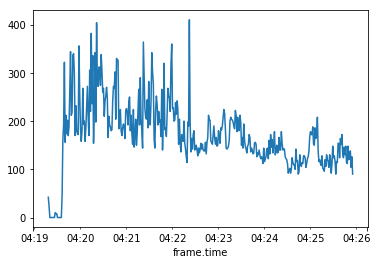

In [304]:
pkt_rate.plot()

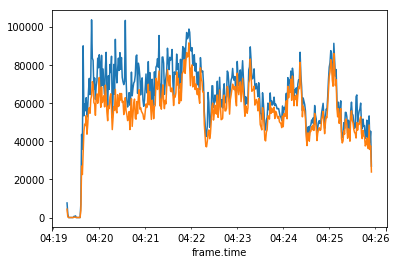

In [305]:
throughput_up.plot()
throughput_dw.plot()

## IP
- Number of IPv4 vs IPv6 packets: Data vs others
- Bytes of IPv4 vs IPv6 packets: Data vs others

## UDP
- Number of UDP packets
- Number of DNS vs Others

In [306]:
print("Number of ipv4 packets = ", len(df[df['ip.version']==4]))
print("Number of ipv6 packets = ", len(df[df['ip.version']==6]))
print("Number of unknown packets = ", len(df[df['ip.version'].isnull()]))

Number of ipv4 packets =  34224
Number of ipv6 packets =  0
Number of unknown packets =  34224


#### NOTES
- wireshark 68448 out of 68480 packets are not localhost
- 34256 ipv4 out of 68480 packets in this trace, of these 34224 are not localhost.
- to find data packets in ipv4 or ipv6, first filter by version and then apply data filter

In [307]:
print("Number of packets with no DATA = ", len( df[ df['tcp.len']<=df['tcp.hdr_len'] ]) )
print("Number of packets with DATA = ", len( df[ df['tcp.len']>df['tcp.hdr_len'] ]) )

Number of packets with no DATA =  16455
Number of packets with DATA =  16879


In [313]:
print("Number of UDP packets = ", len(df[ df['ip.proto']==17]))
print("Number of DNS packets over UDP = ", len(df[ (df['ip.proto']==17) & ((df['udp.srcport']==53) | (df['udp.dstport']==53)) ]) )
print("Number of DNS packets over ICMP/UDP mix = ", len(df_weird_packets))

Number of UDP packets =  854
Number of DNS packets over UDP =  854
Number of DNS packets over ICMP/UDP mix =  130


## DNS
- Number of DNS packets
    - = number of dns packets over UDP (it includes the weird DNS/ICMP mix already)
    - df_dns = df[ (df['ip.proto']==17) & ((df['udp.srcport']==53) | (df['udp.dstport']==53)) ])
- Number queries and responses - on IPv4 and IPv6
    - df_dns_queries = df_dns[ ~df_dns['dns.qry.name'].isnull() and df_dns['dns.time'].isnull() ]
    - len( df_dns[ df_dns[dns.time].isnull() ] )
    - responses => dns.qry.name is not nan and dns.time is not nan (or is not 0)
    - len( df_dns[ ~df_dns[dns.time].isnull() ] )
- Number of error responses
    - len( df_dns[dns.flags.rcode]!=0 )
- DNS LOOKUP TIME = dns.time for responses as a list => max, 90perc, 50perc, avg [describe]
    - df_dns[ ~df_dns[dns.time].isnull() ]
- number of different DNS servers in pcap
    - len( df_dns[ip.src].unique() )
    - or if len( df_dns[ip.dst].unique() ) > 2: print("multiple DNS servers")
- DNS LOOKUP TIME BY QUERY AND SERVER = groupby(dns.time | dns server | dns url) => best and worst performers
    - if multiple dns servers with different DNS response times then report time details of each DNS server
- number of queries vs number of unique queries
    - df_dns_queries.groupby(['dns.qry.name'])['frame.time'].count()
- time between same repeated query in a trace
    - df_dns_queries.groupby(['dns.qry.name'])['frame.time'].diff()
- DNS over TCP and DNSSEC over TCP #TODO: recheck if this makes sense
    - df[ (df['ip.proto']==6) & ((df['tcp.srcport']==53) | (df['tcp.dstport']==53)) ])

## TCP
- Number of TCP packets - on IPv4 and IPv6 (KPI)
    - df_tcp = df[df['ip.proto']==6]
    - Number of TCP over IPv4 = df[ (df['ip.version']==4]) & (df['ip.proto']==6) ]
    - Number of TCP over IPv6 = df[ (df['ip.version']==6]) & (df['ip.proto']==6) ]
- Number of Data packets vs Number of overhead #TODO: tcp flags vs rest or tcp.len==tcp.hdr_len (KPI)
    - Number of Overhead packets = len( df_tcp[ df_tcp[tcp.len] == df_tcp[tcp.hdr_len] ] )
    - Number of Data packets = df_tcp[ df_tcp[tcp.len] > df_tcp[tcp.hdr_len] ]
    - Weird packets = df_tcp[ df_tcp[tcp.len] < df_tcp[tcp.hdr_len] ]
- Number of tcp.analysis.flags and individual flags (retrans, dup_ack, zero_window, etc) (KPI)
    - df_tcp_flagged = df_tcp[~df_tcp['tcp.analysis.flags']]
    - Number of flagged packets = len( df_tcp_flagged )
    - Number of duplicate_acks = df_tcp_flagged['tcp.analysis.duplicate_ack'] (should be equal to df_tcp['tcp.analysis.duplicate_ack'])
    - Number of zero_window packets = df_tcp_flagged['tcp.analysis.zero_window']
    - Number of retransmission packets = df_tcp_flagged['tcp.analysis.retransmission']
- Zombie: number of zombie tcp streams vs number of total tcp streams (KPI)
    - for stream_num, pkts in df_tcp.groupby(tcp.stream):
        if all pkts are overhead (=> pkt['tcp.len'] == pkt['tcp.hdr_len'])
        then stream_num is Zombie
    - * TODO: TCP connections with no data vs time => needs a value of the past to define what zombie is. Eg: was there no data (len==hdr_len) in the tcp.stream in the last '30 sec' then it becomes a ZOMBIE stream at that time
- Concurrent TCP connections vs time (no FIN) (TIME GRAPH)
    - df["num_concurrent_TCP"] = 0; concurrent_tcp = {} # 1=> current stream, 0=> no stream, -1=> finished already
    - for row in df.iterrows:
        if concurrent_tcp.get(row.tcp.stream, 0) == 0:
            concurrent_tcp['row.tcp.stream'] = 1
            row.num_concurrent_TCP += 1
        if concurrent_tcp.get(row.tcp.stream, 0) == 1:
            continue
        if concurrent_tcp.get(row.tcp.stream, 0) == -1:
            print("this is an error case where tcp stream should have been closed previously using FIN")
        if row["tcp.flags.fin"] == 1
            concurrent_tcp['row.tcp.stream'] = -1  # this stream is now closed. error if another packet comes
            row.num_concurrent_TCP -= 1
    - plot column num_concurrent_TCP against frame.time
- Concurrent TCP connections to same server (IP) vs time - shouldn't be more that 6 for browsers in HTTP/1.1 (KPI)
    - * TODO: this hard limit of 6 connections per destination server is mainly defined for browsers. Check separately if this is true for apps and if it is defined by ip.dst or the complete flow. Don't put on dashboard without confirming if http/1.1 standard is enforced for apps or not. Can be confirmed separately with a pcap.
- (max, avg, total) TCP window size vs time
    - As a single KPI: take average of tcp.window_size
    - * TODO: average across tcp.stream and direction doesn't make sense as it neglects information (what is one server is down). But number of tcp.streams are too many to display. How to show this? Average window_size across time, average across ip.dst or ip.src, average across tcp.stream up and down, average across each resampling? Please see: df[['frame.time', 'ip.src', 'ip.dst', 'tcp.stream', 'tcp.window_size']]
- (max, avg, perc) TCP CONNECTION TIME (KPI)
    - stream_to_handshake_time = defaultdict(int)
    - for stream_num_index, row in df_tcp.groupby('tcp.stream').iteritems():
        if row.tcp.len == row.tcp.hdr_len:
            stream_to_handshake_time[stream_num_index] = row.tcp.time_relative
        else:
            break
      print stream_to_handshake_time values => avg time , total time, max time, etc.
    - * TODO: need to confirm hypothesis that OVERHEAD PKTS (handshake) are row.tcp.len == row.tcp.hdr_len. If this is not true, we will need a new way to find overhead packets either using tcp.flags or tcp.data or something.
- TCP Delay/TCP RTT (KPI OR TIME GRAPH):
    - As a single KPI: take average of tcp.analysis.ack_rtt
    - As a time graph however it only makes sense separated or grouped by (ip.dst/ip.src) or (tcp.stream) as ack_rtt is defined for a flow.
- TCP throughput up and down (KPI or TIME GRAPH)
    - As a single KPI: Same/similar to throughput up and down above
    - As a time graph: tcp.len by ack_rtt per 1 sec resampled time window. To separate up and dw direction, df_tcp.groupby([frame.time, ip.src, ip.dst])['tcp.len','tcp.ack_rtt'] => resample by 1 sec and take averages and divide tcp.len by rtt.

In [20]:
df[ ~df['tcp.analysis.flags'].isnull() ]['tcp.analysis.duplicate_ack']

array([nan, '1,1'], dtype=object)

In [26]:
df[['frame.time', 'ip.src', 'ip.dst', 'tcp.stream', 'tcp.window_size']]

,frame.time,ip.src,ip.dst,tcp.stream,tcp.window_size
0,"Dec 23, 2019 04:19:18.159096000 GMT",25.141.92.229,35.198.216.17,0.0,65535.0
1,"Dec 23, 2019 04:19:18.251113000 GMT",35.198.216.17,25.141.92.229,0.0,43440.0
2,"Dec 23, 2019 04:19:18.251471000 GMT",25.141.92.229,35.198.216.17,0.0,82432.0
3,"Dec 23, 2019 04:19:18.254557000 GMT",25.141.92.229,35.198.216.17,0.0,82432.0
4,"Dec 23, 2019 04:19:18.321629000 GMT",35.198.216.17,25.141.92.229,0.0,45056.0
5,"Dec 23, 2019 04:19:18.479019000 GMT",35.198.216.17,25.141.92.229,0.0,45056.0
6,"Dec 23, 2019 04:19:18.479254000 GMT",25.141.92.229,35.198.216.17,0.0,84992.0
7,"Dec 23, 2019 04:19:18.497243000 GMT",35.198.216.17,25.141.92.229,0.0,45056.0
8,"Dec 23, 2019 04:19:18.497492000 GMT",25.141.92.229,35.198.216.17,0.0,88064.0
9,"Dec 23, 2019 04:19:18.497576000 GMT",35.198.216.17,25.141.92.229,0.0,45056.0


## TLS/HTTPS

- Number of packets:
    - Client Hello => tls.record.content_type == 22 and tls.handshake.type == 1
    - Server Hello => tls.record.content_type == 22 and tls.handshake.type == 2
    - Application data => tls.record.content_type == 23
    - Encrypted alert => tls.record.content_type == 21

- ESNI all vs ESNI unique
    - df.groupby(['tls.handshake.extensions_server_name'])['frame.time'].count()
- 3rd party vs 1st party vs CDNs connections
    - assign each ESNI above a label based on whether related to app being tested or not
- Zombie TLS: encrypted handshake keep alive
    - groupby(tcp.stream)
    - for each pkt in a stream:
        if tcp.flags.fin == True:
            if any next packet has tls.record.content_type == 21 (ENCRYPTED ALERT):
                then this is a TLS ZOMBIE STREAM
- COUNT OF DATA in TLS vs OVERHEAD in TLS (KPI)
    - DATA => tls.record.content_type == 23
    - OVERHEAD => tls.record.content_type != 23
- TLS resumed
    - tls.resumed is set (is not nan)
    - tcp.stream for tls.resumed => find client hello in tcp stream (tls.record.content_type == 22 and tls.handshake.type == 1) and find ESNI for that tcp stream in the client hello packet ('tls.handshake.extensions_server_name')
    - report for which ESNI was tls.resumed was set (same tcp.stream)
- Security: cipher text DHE or old (server choice)
    - Find Server Hello packet (tls.record.content_type == 22 and tls.handshake.type == 2) and report (tls.handshake.ciphersuite) a hexadecimal directly
- (max, avg, perc) TLS HANDSHAKE TIME
    - time between CLIENT HELLO and BEFORE APPLICATION DATA => before tls.record.content_type == 23
    - stream_to_handshake_time = defaultdict(int); t1 =0; t2=0;
    - for stream_num_index, row in df_tcp.groupby('tcp.stream').iteritems():
        if row.tls.record.content_type == 22 and row.tls.handshake.type == 1:
            t1 = row.tcp.time_relative
        elif row.tls.record.content_type == 23:
            stream_to_handshake_time[tcp.stream] = t2 - t1
            break
        else:
            t2 = row.tcp.time_relative
      print stream_to_handshake_time values => avg time , total time, max time, etc.

In [31]:
# ESNI repeated client hellos (multiple or shared resources on same server requiring separate TCP/TLS connections)

df.groupby(['tls.handshake.extensions_server_name'])['frame.time'].count()

tls.handshake.extensions_server_name
adx.g.doubleclick.net                   2
akm-img-a-in.tosshub.com               17
api.branch.io                           1
api.openweathermap.org                  5
appfeeds.intoday.in                     4
cdn.branch.io                           1
cdn.liftoff.io                          3
csi.gstatic.com                         2
electionresults.intoday.in              3
feeds.intoday.in                        5
firebaseremoteconfig.googleapis.com     1
fonts.googleapis.com                    3
fonts.gstatic.com                       2
gnu0.azenqos.com                        1
googleads.g.doubleclick.net            19
googleads4.g.doubleclick.net            9
graph.facebook.com                      2
i1.ytimg.com                            2
imasdk.googleapis.com                   1
impression-asia.liftoff.io              2
indiatoday-pdelivery.akamaized.net      3
lh3.googleusercontent.com               3
lh4.googleusercontent.com              

## HTTP: Not really used in our pcaps at all
- 200, 300, 400+ response counts
- data download HTTP vs time
- concurrent HTTP connects vs time
- max concurrent HTTP connects to same server -- should be 6 or lower
- 3rd party, 1st party, CDN resource counts
- (max, avg, perc) TTFB
- (max, avg, perc) DATA DOWNLOAD


## TIMING

### Notes from Vibhu's notebook

In [ ]:
# define function to retrieved the key values based on KPIs
def extract_values(obj, key):
    """Pull all values of specified key from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    results = extract(obj, arr, key)
    return results

AttributeError: 'str' object has no attribute 'values'

In [12]:
df = pd.read_json("../NewsAppData/json/tcpdump_22.59.47.json")

In [8]:
df

,_index,_score,_source,_type
0,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
1,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
2,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
3,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
4,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
5,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
6,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
7,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
8,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
9,packets-2019-12-22,NaN,{'layers': {'frame': {'frame.encap_type': '25'...,doc
